In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv("udemy_courses_pj5.csv", parse_dates=['published_timestamp'])

1.  parse_dates:  parse_dates parameter for read_csv which allows you to define the names of the columns you want to be treated as dates or datetimes:


2. value_counts()  : The value_counts() method returns a Series containing the counts of unique values


3. Countplot:  countplot() method is used to show the counts of observations in each categorical bin using bars.


4. Barplot(): Bar plots or graphs are useful for displaying relationships between categorical data and at least one numerical variable. 

Questions:
1. Display Top 10 Rows of The Dataset
2. Check Last 5 Rows of The Dataset
3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
5. Check Null Values In The Dataset
6. Check For Duplicate Data and Drop Them
7. Find Out Number of Courses Per Subjects
8. For Which Levels, Udemy Courses Providing The Courses
9. Display The Count of Paid and Free Courses 
10. Which Course Has More Lectures (Free or Paid)?
11. Which Courses Have A Higher Number of Subscribers Free or Paid?
12. Which Level Has The Highest Number of Subscribers?
13. Find Most Popular Course Title
14. Display 10 Most Popular Courses As Per Number of Subscribers
15. Find The Course Which Is Having The Highest Number of Reviews.
16. Does Price Affect the Number of Reviews?
17. Find Total Number of Courses Related To Python
18. Display 10 Most Popular Python Courses As Per Number of Subscribers
19. In Which Year The Highest Number of Courses Were Posted?
20. Display Category-Wise Count of Posted Subjects [Year Wise] 

In [ ]:
df.dtypes

In [ ]:
#1 display top ten rows of the dataset
df.head(10)

In [ ]:
#2 check last 5 rows of the dataset
df.tail()

In [ ]:
#3 find shape of our dataset
print("No. of rows: ",df.shape[0])
print("No. of columns: ",df.shape[1])

In [ ]:
#4 getting information about our dataset like total no. of rows, total no. of col, datatype of each col and memory requirements
df.info()

In [ ]:
#5 check null values in the dataset
df.isnull().sum().plot(kind='bar')

In [ ]:
#6 check for the duplicate data and drop them 
df.duplicated().sum()

In [11]:
#drop duplicate 
df= df.drop_duplicates()

In [ ]:
df.duplicated().sum()

In [ ]:
#7 fing out number of courses per subjects
df.columns

In [ ]:
df.groupby("subject")['course_id'].count()

In [ ]:
df['subject'].value_counts() .plot(kind='bar')
plt.ylabel('no of courses')

In [ ]:
#8 for which levels, udemy courses providing the courses 
print(df['level'].unique())

In [ ]:
#9 display the count of paid and free courses
a=df["is_paid"].value_counts()
a

In [ ]:
print('count of free courses: ',a.iloc[1])
print('count of paid courses: ',a.iloc[0])

In [ ]:
#9.2 which has more no of courses free or paid
condition=df['is_paid'].value_counts().idxmax()
ans='paid' if condition else 'free'
print(ans, 'has more courses')

In [ ]:
labal=[df['is_paid'].value_counts().idxmax() , df['is_paid'].value_counts().idxmin()] 
plt.pie(df['is_paid'].value_counts(), labels=labal, explode=[0.1,0.1], shadow=True, autopct="0.1%%")
plt.title("course is paid")
plt.legend()
plt.show()

In [ ]:
#10 which course has more lectures free or paid
df.groupby(['is_paid'])['num_lectures'].mean()

In [ ]:
df.groupby(['is_paid'])['num_subscribers'].mean()

In [ ]:
#11 which courses has a higher no of subscriber free or paid
x=df.groupby(['is_paid'])['num_subscribers'].mean().max()
ans='free' if x else 'paid'
print(ans, 'has more lectures')

In [ ]:
df.groupby(['is_paid'])['num_subscribers'].mean().plot(kind='bar')
plt.ylabel("no of subscribers")
plt.show()

In [ ]:
#12 which level has the  highest no of subscribers
df.groupby( "level")['num_subscribers'].count().plot(kind='bar')

In [ ]:
#13 most popular course title
df[df['num_subscribers'].max()==df['num_subscribers']]['course_title']

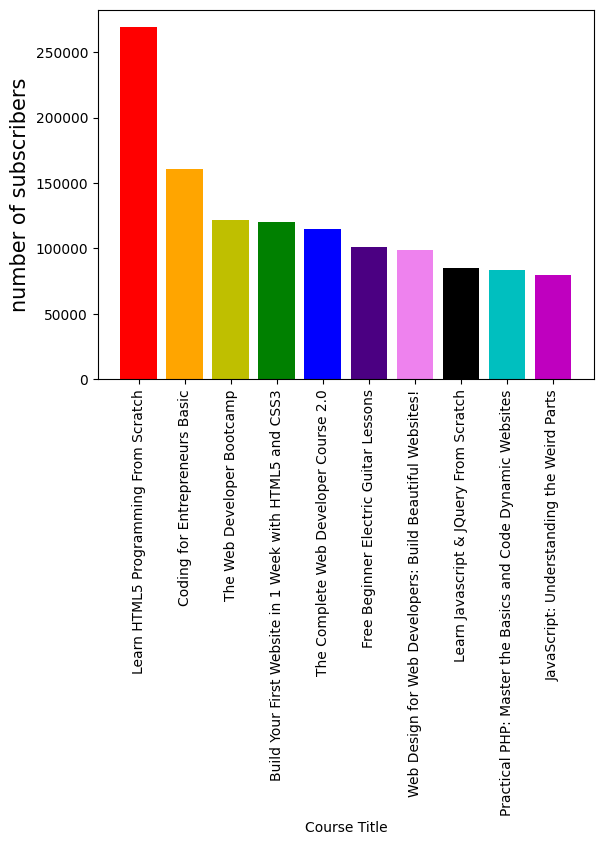

In [86]:
#14 display 10 most popular courses as per number of subscribers
top_10= df.sort_values(by="num_subscribers", ascending=False)["course_title"].head(10)
y=df.sort_values(by="num_subscribers", ascending=False)["num_subscribers"].head(10)
plt.bar(top_10,y, color=['r','orange','y','g','b','indigo','violet','k','c','m'])
plt.xticks(rotation=90)
plt.xlabel('Course Title')
plt.ylabel("number of subscribers", fontsize=15)
plt.show()

In [87]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
#15 find the course which is having the highest num of reviews
high_review= df.sort_values(by='num_reviews', ascending=False)['course_title'].head(1)
print(high_review)

In [88]:
df['subject']

0       Business Finance
1       Business Finance
2       Business Finance
3       Business Finance
4       Business Finance
              ...       
3673     Web Development
3674     Web Development
3675     Web Development
3676     Web Development
3677     Web Development
Name: subject, Length: 3672, dtype: object

In [ ]:
#16 does price affect the number of reviews 
df[['num_reviews', "is_paid"]].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()